In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt



Found 1789 images belonging to 4 classes.
Found 198 images belonging to 4 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d_1  (None, 1536)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 512)               786944    
                                                                 
 batch_normalization_408 (B  (None, 512)               2048      
 atchNormalization)                                              
                                                                 
 dropout_2 (Dropout)         (None, 5

C:\Users\roma\AppData\Local\Temp\ipykernel_12880\962155926.py:89: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
111/111 [==============================] - 263s 2s/step - loss: 0.7291 - accuracy: 0.7574 - val_loss: 0.8643 - val_accuracy: 0.7424 - lr: 0.0010
Epoch 2/50
111/111 [==============================] - 250s 2s/step - loss: 0.5443 - accuracy: 0.8010 - val_loss: 0.3808 - val_accuracy: 0.8586 - lr: 0.0010
Epoch 3/50
111/111 [==============================] - 246s 2s/step - loss: 0.4389 - accuracy: 0.8396 - val_loss: 0.4219 - val_accuracy: 0.8535 - lr: 0.0010
Epoch 4/50
111/111 [==============================] - 243s 2s/step - loss: 0.3973 - accuracy: 0.8446 - val_loss: 0.4007 - val_accuracy: 0.8485 - lr: 0.0010
Epoch 5/50
111/111 [==============================] - 254s 2s/step - loss: 0.3751 - accuracy: 0.8681 - val_loss: 0.3407 - val_accuracy: 0.8838 - lr: 0.0010
Epoch 6/50
111/111 [==============================] - 266s 2s/step - loss: 0.3860 - accuracy: 0.8575 - val_loss: 0.4596 - val_accuracy: 0.8384 - lr: 0.0010
Epoch 7/50
111/111 [==============================] - 298s 3s/st

C:\Users\roma\AppData\Local\Temp\ipykernel_12880\962155926.py:107: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
111/111 [==============================] - 238s 2s/step - loss: 0.1322 - accuracy: 0.9525 - val_loss: 0.2702 - val_accuracy: 0.9091 - lr: 1.0000e-06
Epoch 2/50
111/111 [==============================] - 223s 2s/step - loss: 0.1214 - accuracy: 0.9598 - val_loss: 0.2709 - val_accuracy: 0.9091 - lr: 1.0000e-06
Epoch 3/50
111/111 [==============================] - 220s 2s/step - loss: 0.1326 - accuracy: 0.9553 - val_loss: 0.2719 - val_accuracy: 0.9141 - lr: 1.0000e-06
Epoch 4/50
111/111 [==============================] - 226s 2s/step - loss: 0.1241 - accuracy: 0.9586 - val_loss: 0.2726 - val_accuracy: 0.9141 - lr: 1.0000e-06
Epoch 5/50
111/111 [==============================] - 217s 2s/step - loss: 0.1334 - accuracy: 0.9519 - val_loss: 0.2702 - val_accuracy: 0.9091 - lr: 1.0000e-06
Epoch 6/50
111/111 [==============================] - 214s 2s/step - loss: 0.1272 - accuracy: 0.9547 - val_loss: 0.2713 - val_accuracy: 0.9141 - lr: 1.0000e-06
Epoch 7/50
111/111 [====================

Epoch 48/50
111/111 [==============================] - 223s 2s/step - loss: 0.1195 - accuracy: 0.9603 - val_loss: 0.2745 - val_accuracy: 0.9091 - lr: 1.0000e-10
Epoch 49/50
111/111 [==============================] - 220s 2s/step - loss: 0.1488 - accuracy: 0.9519 - val_loss: 0.2716 - val_accuracy: 0.9141 - lr: 1.0000e-10
Epoch 50/50
111/111 [==============================] - 225s 2s/step - loss: 0.1200 - accuracy: 0.9575 - val_loss: 0.2696 - val_accuracy: 0.9141 - lr: 1.0000e-10


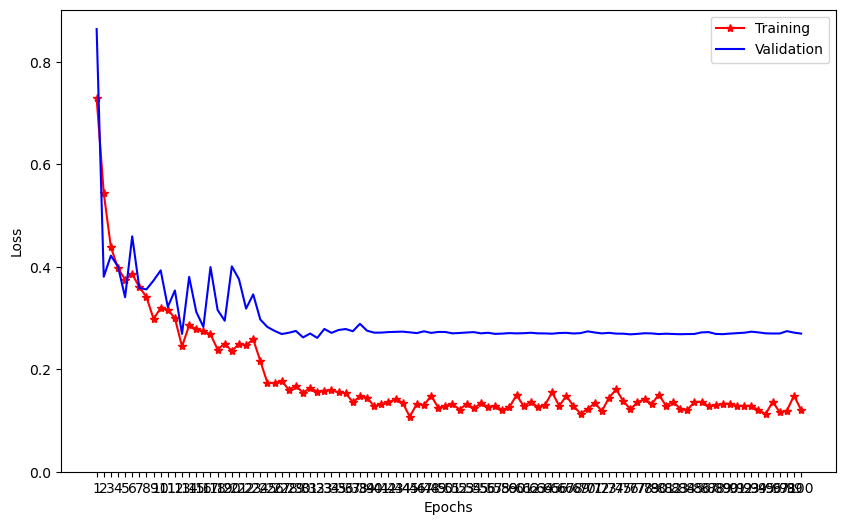

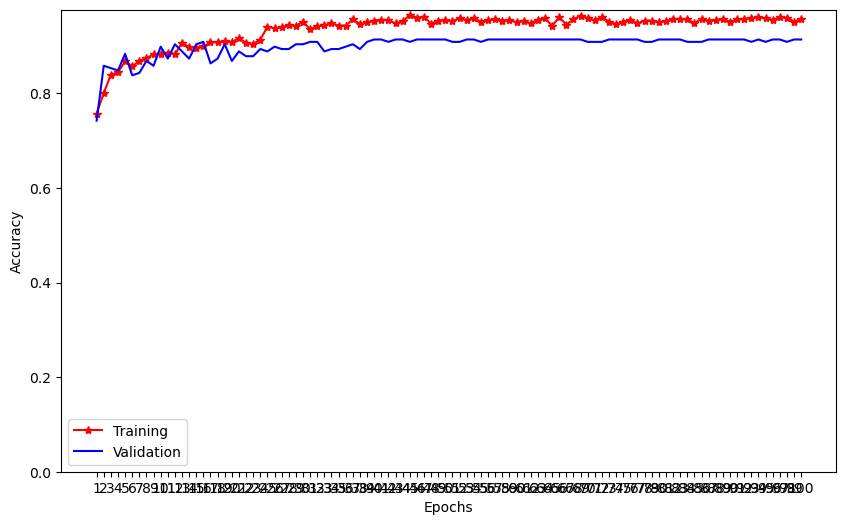

In [3]:
np.random.seed(2022)
tf.random.set_seed(2022)
SEED = 2022
%matplotlib inline

train_path = 'data'
valid_path = 'data'

IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
# extract images to training set by applying data preprocessing and data augmentation
train_batches = ImageDataGenerator(
    preprocessing_function=  tf.keras.applications.inception_resnet_v2.preprocess_input  ,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1).flow_from_directory(
    directory=train_path, target_size=(IMG_SIZE,IMG_SIZE), classes=[ 'glass', 'metal', 'paper', 'plastic'], batch_size=16, subset='training',seed=SEED)


# extract images to validation set
valid_batches = ImageDataGenerator(
    preprocessing_function=  tf.keras.applications.inception_resnet_v2.preprocess_input  ,
    validation_split=0.1).flow_from_directory(
    directory=valid_path, target_size=(IMG_SIZE,IMG_SIZE), classes=['glass', 'metal', 'paper', 'plastic'], batch_size=16, subset='validation',seed=SEED)



base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(
    input_shape=IMG_SHAPE, include_top=False,
    weights='imagenet', pooling=None,
    )

model = Sequential()
base_model.trainable=False

model.add(base_model)
model.add(GlobalAveragePooling2D())


model.add(Dense(units=512, activation='relu')) 
model.add(BatchNormalization())                 
model.add(Dropout(0.2))                         


model.add(Dense(units=128, activation='relu')) 
model.add(BatchNormalization())                
model.add(Dropout(0.2))                        # applies dopout to the input which will randomly disable 20% of hidden units


model.add(Dense(units=4, activation='softmax'))# use Softmax activation function to do final predictions
model.summary()
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

import os
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'inceptionResnetV2_%s_model.{epoch:03d}.h5' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
from keras.callbacks import ModelCheckpoint, LearningRateScheduler,ReduceLROnPlateau
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)



from keras.callbacks import ModelCheckpoint, LearningRateScheduler,ReduceLROnPlateau
lr_reducer = ReduceLROnPlateau(monitor='val_loss',factor=0.1,
                               cooldown=0,
                               patience=10,
                               min_lr=0,
                               verbose=1,
                               mode='auto',
                               epsilon=0.001)

es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=30)

callbacks = [lr_reducer,es]

history = model.fit_generator(
   train_batches,
    steps_per_epoch=train_batches.samples/train_batches.batch_size ,
    epochs=50,
    validation_data=valid_batches,
    validation_steps=valid_batches.samples/valid_batches.batch_size,
    verbose=1,
    callbacks = callbacks)
loss = history.history['loss']
validation_loss = history.history['val_loss']
accuracy = history.history['accuracy']
validation_accuracy =history.history['val_accuracy']

#base_model.trainable=True
from tensorflow.keras import layers
for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
history = model.fit_generator(
   train_batches,
    steps_per_epoch=train_batches.samples/train_batches.batch_size ,
    epochs=50,
    validation_data=valid_batches,
    validation_steps=valid_batches.samples/valid_batches.batch_size,
    verbose=1,
    callbacks = callbacks)
loss.extend(history.history['loss'])
validation_loss.extend(history.history['val_loss'])
accuracy.extend(history.history['accuracy'])
validation_accuracy.extend(history.history['val_accuracy'])



epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,'r*-',label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0,max(plt.ylim())])
plt.xticks(epochs)
plt.legend()

epochs1 = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs1,accuracy,'r*-',label="Training")
plt.plot(epochs1,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0,max(plt.ylim())])
plt.xticks(epochs1)
plt.legend()
def save_txt(file_name='',object=[]):
    file = open(file_name, 'w')
    file.write(str(object))
    file.close()
    
save_txt('./loss.txt',loss)
save_txt('./val_loss.txt',validation_loss)
save_txt('./acc.txt',accuracy)
save_txt('./val_acc.txt',validation_accuracy)
save_path='./densnet201_parameter1_20.h5'
model.save_weights(save_path)

In [4]:
# Save the model in SavedModel format
saved_model_path = 'model_saved' #.h5
model.save(saved_model_path)

INFO:tensorflow:Assets written to: model_saved\assets


INFO:tensorflow:Assets written to: model_saved\assets
'tensorflowjs_converter' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
# Convert and save the model in TensorFlow Lite format
tflite_model_path = 'model.tflite'
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\roma\AppData\Local\Temp\tmpget9x95l\assets


INFO:tensorflow:Assets written to: C:\Users\roma\AppData\Local\Temp\tmpget9x95l\assets


In [ ]:
#  load pre-trained
model = tf.load_model("model.h5")
predict = model.predict(**args)

In [ ]:
def api(data_dict):
    model = tf.load_model("model.h5")
    resp = model.predict(*args)
    return json.dumps(resp)